## Gradient Boosting Machine

__AdaBoosting 방법__

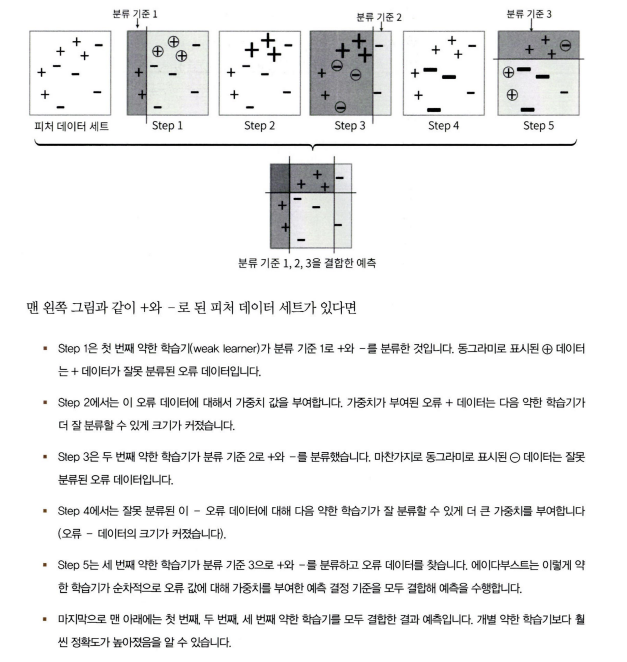

__GradientBoosting은 AdaBoosting + Gradient Descent__

GBM도 AdaBoost와 유사하나, `가중치 업데이트를 경사하강법`을 이용한다.

오류값은 실제값 - 예측값

분류의 실제 결과값을 $y$, 피처를 $x_1, x_2,..., x_n$, 이 피처에 기반한 예측함수를 $F(x)$ 라고 한다면, 오류식 $h(x)=y-F(x)$ 를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것이 경사하강법이다. 

__CART기반의 알고리즘이다.__

************

### Human Activity Using Smartphone dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 Dataframe으로 로드
feature_name_df = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.ML\1.Supervised_Learning\1.Classification\3.Decision_Tree\datasets\UCI HAR Dataset\features.txt',
                              sep='\s+', header=None, names=['column_index', 'column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


> 인체의 움직임과 관련된 속성의 평균/표준편차가 X, Y, Z축 값으로 돼 있음을 유추할 수 있다. <br>
> features.txt 파일은 중복된 피처명을 가지고 있다. 이 중복된 피처명들을 이용해 데이터 파일을 데이터 세트 DataFrame에 로드하면 오류가 발생한다. <br>
> 따라서 중복된 피처명에 대해서는 원본 피처명에서 _1 또는 _2를 추가로 부여해 변경한 뒤에 이를 이용해 DataFrame에 로드

In [2]:
# 중복된 피처명의 개수 구해보기
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


> 총 42개의 피처명이 중복돼 있다. <br>
> 이 중복된 피처명에 대해서는 원본 피처명에 _1 또는 _2 를 추가로 부여해 새로운 피처명을 가지는 DataFrame을 반환하는 함수인 get_new_feature_name_df()를 생성

In [3]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                                               if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [4]:
import pandas as pd

def get_human_datasets():

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.ML\1.Supervised_Learning\1.Classification\3.Decision_Tree\datasets\UCI HAR Dataset\features.txt',
                              sep='\s+', header=None, names=['column_index', 'column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.ML\1.Supervised_Learning\1.Classification\3.Decision_Tree\datasets\UCI HAR Dataset\train\X_train.txt',
                          sep='\s+', names=feature_name)
    X_test = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.ML\1.Supervised_Learning\1.Classification\3.Decision_Tree\datasets\UCI HAR Dataset\test\X_test.txt',
                          sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여.
    y_train = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.ML\1.Supervised_Learning\1.Classification\3.Decision_Tree\datasets\UCI HAR Dataset\train\y_train.txt',
                          sep='\s+', names=['action'])
    y_test = pd.read_csv(r'C:\Users\hanjieun_2\Desktop\개인공부\algorithms\1.ML\1.Supervised_Learning\1.Classification\3.Decision_Tree\datasets\UCI HAR Dataset\test\y_test.txt',
                          sep='\s+', names=['action'])
    
    # 로드된 학습/테스트 용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_datasets()

In [5]:
print('##학습 피처 데이터셋 info()')
print(X_train.info())

##학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [6]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

# GBM 모델 생성
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
pred = gb.predict(X_test)

print('GradientBoosting 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))
print('GradientBoosting 수행시간:{0:.4f}'.format(time.time()-start_time))


GradientBoosting 예측 정확도: 0.9389
GradientBoosting 수행시간:1839.0582


- **Gradient Boosting Parameters** 


loss: Literal["log_loss", "deviance", "exponential", "log_loss"] = "log_loss",

learning_rate: Float = 0.1,

n_estimators: Int = 100,

subsample: Float = 1.0,

criterion: Literal["friedman_mse", "squared_error", "friedman_mse"] = "friedman_mse", 

min_samples_split: float | int = 2,

min_samples_leaf: float | int = 1,

min_weight_fraction_leaf: Float = 0.0,

max_depth: None | int = 3,

min_impurity_decrease: Float = 0.0,

init: None | str | BaseEstimator = None,

random_state: RandomState | None | Int = None,

max_features: float | None | Literal["auto", "sqrt", "log2"] | int = None,

verbose: Int = 0,

max_leaf_nodes: None | Int = None,

warm_start: bool = False,

validation_fraction: Float = 0.1,

n_iter_no_change: None | Int = None,

tol: Float = 1e-4,

ccp_alpha: float = 0.0,

### GridSearchCV를 활용하여 최적의 파라미터 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'loss' : ['log_loss', 'deviance'],
    'learning_rate':[0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth' : [8,16,24],
    'min_samples_leaf' : [1,6,12],
    'min_samples_split' : [2,8,16]
}

# RandomFroestClassifier 객체 생성 후 GridSearchCV 수행
gb2 = GradientBoostingClassifier(n_estimators=100, random_state=0)

grid_cv = GridSearchCV(gb2, param_grid=params, cv=5)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

> 시간이 너무 오래걸리는 관계로 패스..